## Cloning GitHub

In [ ]:
!git clone https://github.com/sinhajiya/Face_Recognition_from_Features_using_Yale_Face_Database.git

Cloning into 'Face_Recognition_from_Features_using_Yale_Face_Database'...
remote: Enumerating objects: 3406, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 3406 (delta 29), reused 40 (delta 20), pack-reused 3352 (from 1)
Receiving objects: 100% (3406/3406), 128.46 MiB | 10.56 MiB/s, done.
Resolving deltas: 100% (1230/1230), done.


## Importing Libraries

In [ ]:
import numpy as np
import shutil
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LogisticRegression
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from PIL import Image
from scipy.ndimage import convolve
from sklearn.model_selection import cross_val_score
import seaborn as sns
from skimage import feature
from skimage import io
from skimage.feature import graycomatrix, graycoprops
from skimage import img_as_ubyte

## Visualizing Sample Data

In [ ]:
sample_img = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/data/subject01.centerlight"
img = Image.open(sample_img)
type(img)

PIL.GifImagePlugin.GifImageFile

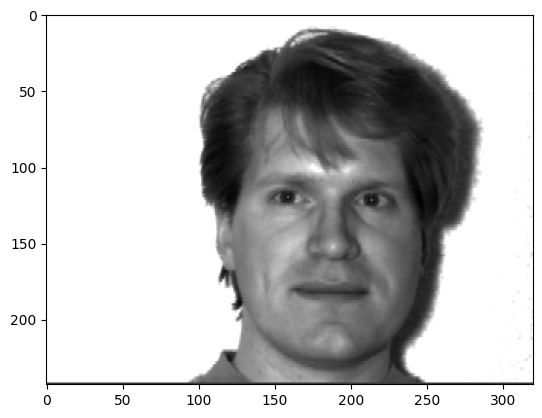

In [ ]:
plt.imshow(img,cmap="gray")

In [ ]:
img_ndarray = np.asarray(img)

## Convert files to .npy

In [ ]:
image_dir = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/data'
npy_dir = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files'

In [ ]:
os.makedirs(npy_dir, exist_ok=True)

In [ ]:
for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    image = Image.open(image_path)
    image = np.asarray(image)

    if image is not None:
        npy_path = os.path.join(npy_dir, f"{(filename)}.npy")
        np.save(npy_path, image)
        print(f"Saved {filename} as {npy_path}")

    else:
        print(f"Failed to load image {filename}")

print("All images converted to .npy format.")


Saved subject10.surprised as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject10.surprised.npy
Saved subject09.wink as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject09.wink.npy
Saved subject14.glasses as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject14.glasses.npy
Saved subject12.sad as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject12.sad.npy
Saved subject06.sad as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject06.sad.npy
Saved subject01.centerlight as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject01.centerlight.npy
Saved subject06.glasses as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/subject06.glasses.npy
Saved subject10.normal as /content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files/s

## Face Detection

In [ ]:
# Loading Model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
# Function to detect and crop image using the Classifier
def detect_faces(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

def crop_faces(image, faces):
    face_images = []
    for (x, y, w, h) in faces:
        face_img = image[y:y+h, x:x+w]
        face_images.append(face_img)
    return face_images

In [ ]:
output_dir = '/content/cropped_faces'
os.makedirs(output_dir)

In [ ]:
data_dir = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/data_npy_files'

for filename in os.listdir(data_dir):
    if filename.endswith('.npy'):
        image_path = os.path.join(data_dir, filename)
        image = np.load(image_path)

        faces = detect_faces(image)

        if len(faces) > 0:
            cropped_faces = crop_faces(image, faces)
            subject_name = os.path.splitext(filename)[0]

            for i, face in enumerate(cropped_faces):
                output_filename = f"{subject_name}.npy"
                np.save(os.path.join(output_dir, output_filename), face)
                print(f"Saving {output_filename}")
        else:
            print(f"No faces detected in {filename}")

print("Face detection and saving completed for all images.")

Saving subject03.happy.npy
Saving subject05.wink.npy
Saving subject09.centerlight.npy
Saving subject07.rightlight.npy
Saving subject05.sleepy.npy
Saving subject03.wink.npy
Saving subject09.surprised.npy
Saving subject04.normal.npy
Saving subject05.normal.npy
Saving subject07.sad.npy
Saving subject09.wink.npy
Saving subject02.wink.npy
Saving subject08.centerlight.npy
Saving subject11.centerlight.npy
Saving subject03.centerlight.npy
Saving subject06.normal.npy
Saving subject04.sad.npy
Saving subject11.rightlight.npy
Saving subject10.sleepy.npy
Saving subject13.happy.npy
Saving subject12.leftlight.npy
Saving subject05.happy.npy
Saving subject01.happy.npy
Saving subject07.noglasses.npy
Saving subject13.normal.npy
Saving subject10.sad.npy
Saving subject10.happy.npy
Saving subject09.noglasses.npy
Saving subject04.surprised.npy
Saving subject08.wink.npy
Saving subject15.rightlight.npy
Saving subject14.wink.npy
Saving subject10.noglasses.npy
Saving subject10.centerlight.npy
Saving subject15.su

In [ ]:
i = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_faces/subject01.centerlight.npy")

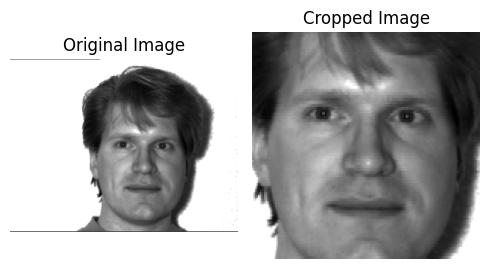

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5,5))

axes[0].imshow(img, cmap="gray")
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(i, cmap="gray")
axes[1].axis('off')
axes[1].set_title("Cropped Image")

plt.tight_layout()
plt.show()

In [ ]:
import shutil

folder_to_zip = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_resized'
output_zip = 'cropped_resized.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', folder_to_zip)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: cropped_resized.zip


# Image Visualization and Preprocessing

1. Look at the data
2. Distribution of images and expressions.
3. Check if all of them are of same size. If not, resize.
4. Normalize
5. Resize
6. Show Image Histogram

In [ ]:
data_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_faces"

## Data Visualization

In [ ]:
def show_data(subject_id):
    emotions = ['centerlight', 'happy', 'leftlight','glasses','normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink','noglasses']
    images = []
    for emotion in emotions:
        filename = f'subject{subject_id}.{emotion}.npy'
        filepath = os.path.join(data_dir, filename)
        try:
            img = np.load(filepath)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {filepath}")

    # Define the grid size for visualization
    grid_size = (3,4)

    # Create a new figure
    plt.figure(figsize=(15,12))

    # Plot each image
    for i, img in enumerate(images):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(img, cmap='gray')  # Show image in grayscale
        plt.axis('off')
        plt.title(f'{emotions[i]}', fontsize=10)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.suptitle(f"Images of Subject {subject_id}", fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


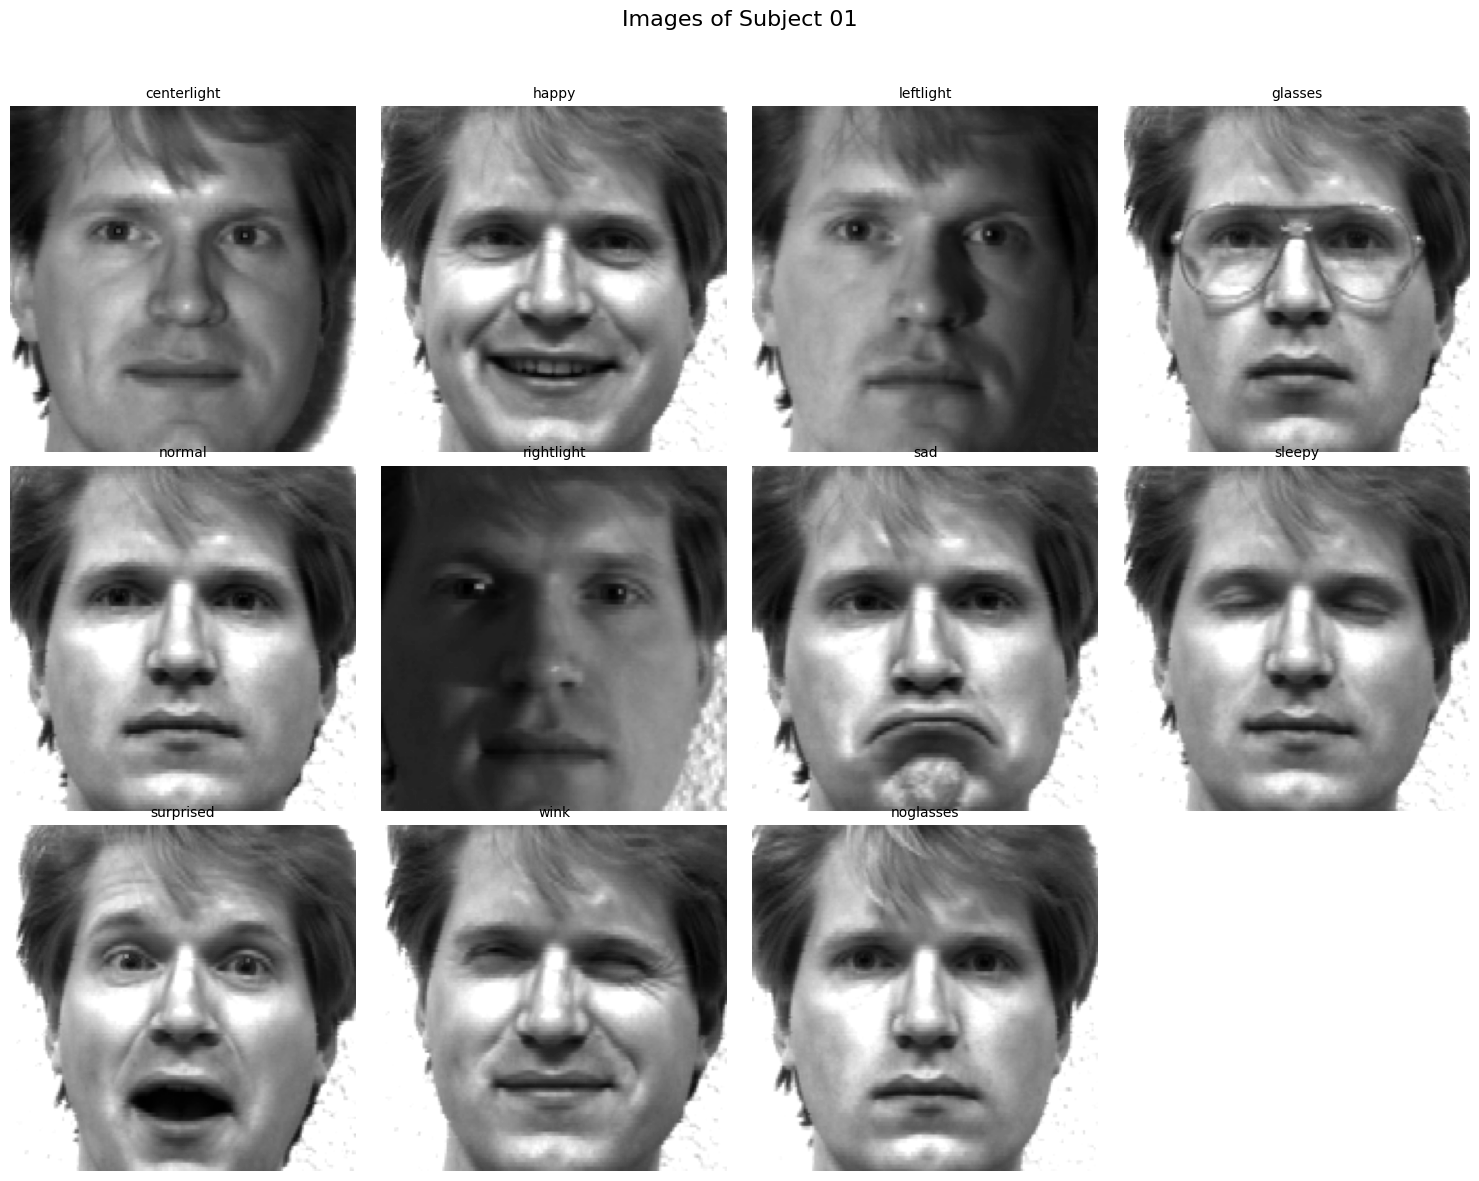

In [ ]:
show_data(subject_id='01')

## Distribution of data


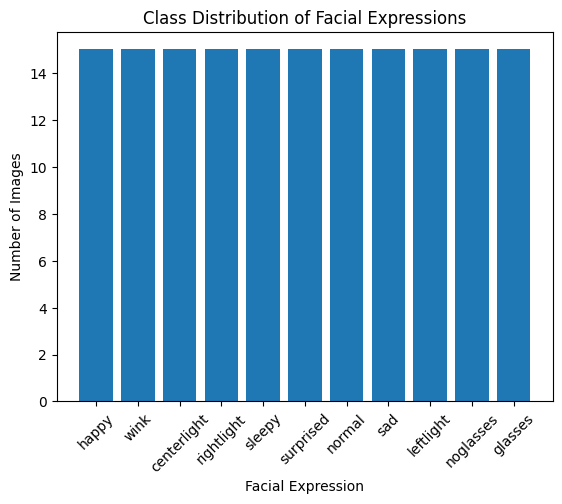

In [ ]:
expression_counts = {}

for filename in os.listdir(data_dir):
    expression = filename.split('.')[1]
    if expression in expression_counts:
        expression_counts[expression] += 1
    else:
        expression_counts[expression] = 1


plt.bar(expression_counts.keys(), expression_counts.values())
plt.xlabel('Facial Expression')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Facial Expressions')
plt.xticks(rotation=45)
plt.show()


## Check if all the images are of same size

In [ ]:
def hasSameShape(directory,n=True):

    shape = set()  # Use a set to store unique sizes

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
          if n == True:
            img = np.load(filepath)
            shape.add(img.shape)  # Add size (width, height) to the set
          else:
            with (Image.open(filepath)) as img:
              img = np.asarray(img)
              shape.add(img.shape)
        except IOError:
            print(f"Cannot open file: {filepath}")

    if len(shape) == 1:  #since sizes is a set, it will not store duplicates.
        # All images have the same size
        sh = shape.pop()  # Get the unique size
        return True
    else:
        # Images have different sizes
        return False


In [ ]:
cr = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_faces'
d = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/data'

print(f"The Original Data have the Same Shape: {hasSameShape(d,n= False)}")
print(f"The Cropped Faces have the Same Shape: {hasSameShape(cr)}")


The Original Data have the Same Shape: True
The Cropped Faces have the Same Shape: False


## Normalization

In [ ]:
normalized_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/normalized_cropped"

In [ ]:
def normalize_image(directory, output_directory):

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            img_ndarray = np.load(filepath)
            img_ndarray = img_ndarray.astype(np.float32)
            img_ndarray /= 255.0

            output_filepath = os.path.join(output_directory, f"{filename}")
            np.save(output_filepath, img_ndarray)

        except IOError:
            print(f"Cannot open file: {filepath}")
    return True

This function normalizes the image and stores in the folder named normalized_dir.

In [ ]:
normalize_image(data_dir,normalized_dir)

True

### Opening Normalized Image

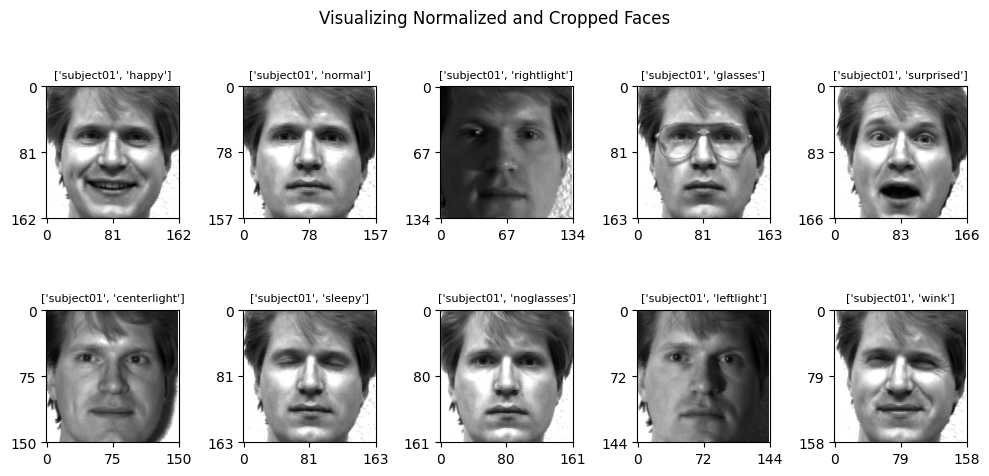

In [ ]:
npy_files = [f for f in os.listdir(normalized_dir) if f.startswith('subject01') and f.endswith('.npy')]

files_to_display = npy_files[:10]

plt.figure(figsize=(10, 5))
plt.suptitle("Visualizing Normalized and Cropped Faces")
for i, filename in enumerate(files_to_display):
    file_path = os.path.join(normalized_dir, filename)
    image = np.load(file_path)
    f = filename.split('.')[0:2]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.xticks([0, image.shape[1] // 2, image.shape[1]])
    plt.yticks([0, image.shape[0] // 2, image.shape[0]])
    plt.title(f, fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
output_zip = 'normalized.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', normalized_dir)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: normalized.zip


## Resizing

In [ ]:
resized_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/resized"
os.makedirs(resized_dir, exist_ok=True)

In [ ]:
desired_size = (128, 128)
for filename in os.listdir(normalized_dir):
    file_path = os.path.join(normalized_dir, filename)
    if filename.lower().endswith('.npy'):
        image = np.load(file_path)
        if image is None:
            print(f"Could not read {filename}. Skipping.")
            continue
        resized_image = cv2.resize(image, desired_size, interpolation=cv2.INTER_AREA)
        output_path = os.path.join(resized_dir, filename)
        np.save(output_path, resized_image)

        print(f"Resized and saved: {filename}")

print("All images resized successfully!")

Resized and saved: subject03.happy.npy
Resized and saved: subject05.wink.npy
Resized and saved: subject09.centerlight.npy
Resized and saved: subject07.rightlight.npy
Resized and saved: subject05.sleepy.npy
Resized and saved: subject03.wink.npy
Resized and saved: subject09.surprised.npy
Resized and saved: subject04.normal.npy
Resized and saved: subject05.normal.npy
Resized and saved: subject07.sad.npy
Resized and saved: subject09.wink.npy
Resized and saved: subject02.wink.npy
Resized and saved: subject08.centerlight.npy
Resized and saved: subject11.centerlight.npy
Resized and saved: subject03.centerlight.npy
Resized and saved: subject06.normal.npy
Resized and saved: subject04.sad.npy
Resized and saved: subject11.rightlight.npy
Resized and saved: subject10.sleepy.npy
Resized and saved: subject13.happy.npy
Resized and saved: subject12.leftlight.npy
Resized and saved: subject05.happy.npy
Resized and saved: subject01.happy.npy
Resized and saved: subject07.noglasses.npy
Resized and saved: su

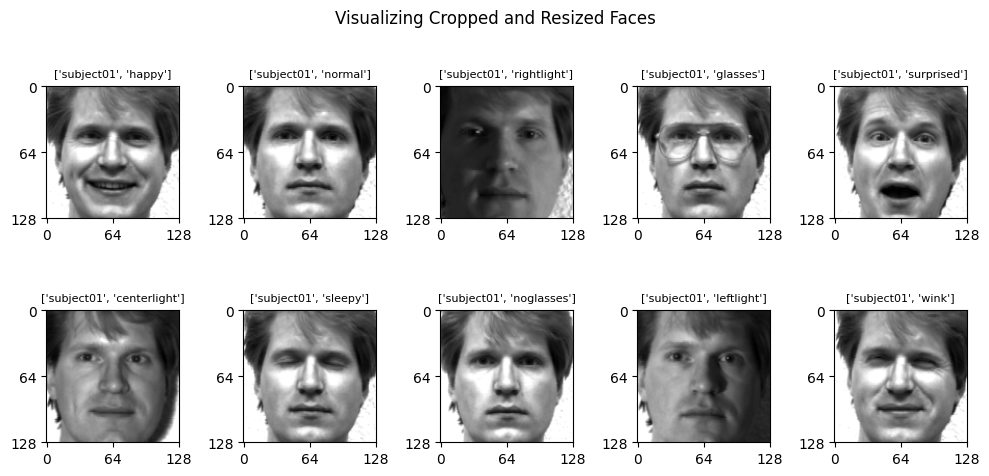

In [ ]:
npy_files = [f for f in os.listdir(normalized_dir) if f.startswith('subject01') and f.endswith('.npy')]

files_to_display = npy_files[:10]
plt.figure(figsize=(10, 5))
plt.suptitle("Visualizing Cropped and Resized Faces")
for i, filename in enumerate(files_to_display):
    file_path = os.path.join(resized_dir, filename)
    image = np.load(file_path)
    f = filename.split('.')[0:2]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f, fontsize=8)
    plt.xticks([0, image.shape[1] // 2, image.shape[1]])
    plt.yticks([0, image.shape[0] // 2, image.shape[0]])
plt.tight_layout()

plt.show()


In [ ]:
output_zip = 'resized.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', resized_dir)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: resized.zip


## Histogram of Pixel Values of the image

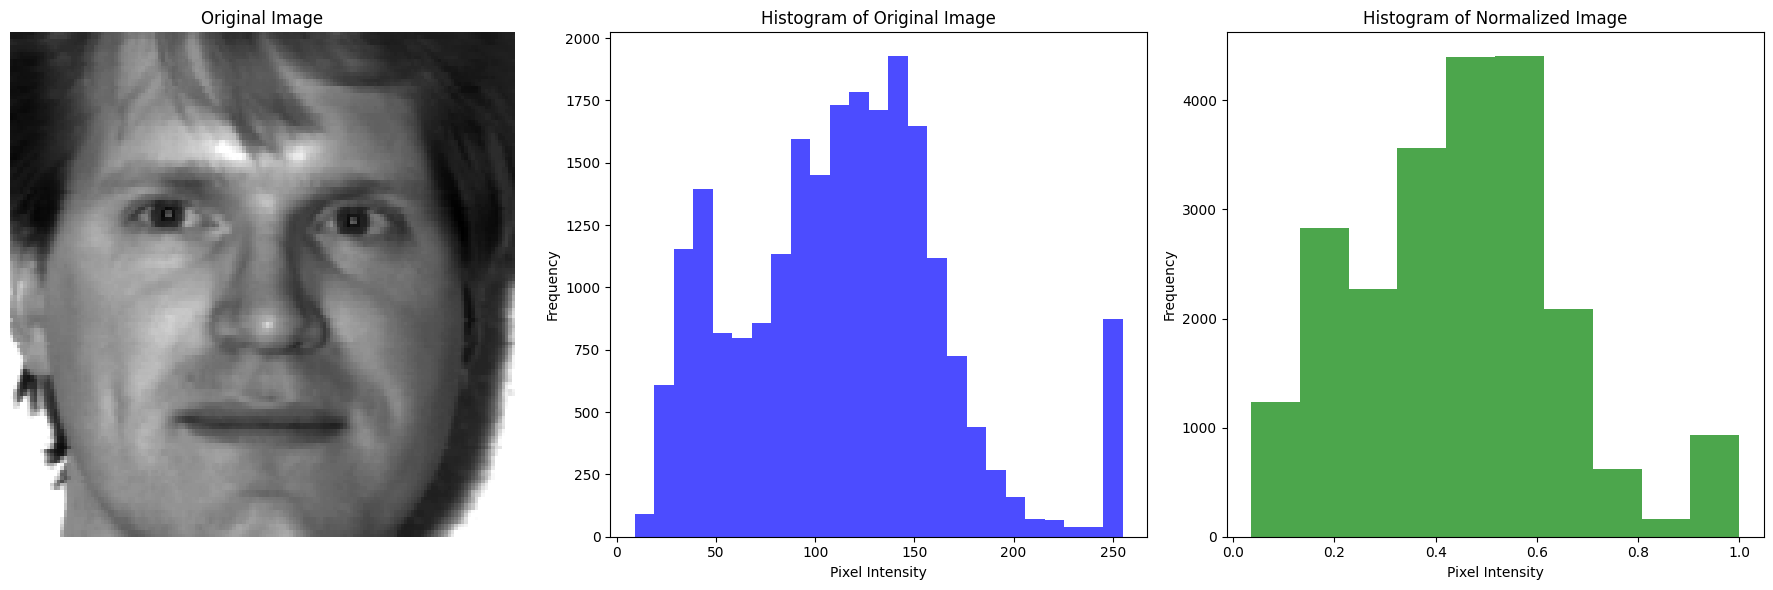

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
img_ndarray = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_faces/subject01.centerlight.npy")
normalizedimg = np.load("//content/Face_Recognition_from_Features_using_Yale_Face_Database/normalized_cropped/subject01.centerlight.npy")

# Display the im image
axes[0].imshow(img_ndarray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Histogram of original image
axes[1].hist(img_ndarray.ravel(), bins=25, color='blue', alpha=0.7)
axes[1].set_title("Histogram of Original Image")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

# Histogram of normalized image

axes[2].hist(normalizedimg.ravel(), bins=10, color='green', alpha=0.7)
axes[2].set_title("Histogram of Normalized Image")
axes[2].set_xlabel("Pixel Intensity")
axes[2].set_ylabel("Frequency")

# Show plot
plt.tight_layout()
plt.show()

# Feature Extraction

1. Local Binary Pattern
2. Gabor filter
3. Laplacian of Gaussian (LoG)
4. Gray-Level Co-occurrence Matrix (GLCM)


## Local Binary Pattern

### Code

In [ ]:
from skimage.feature import local_binary_pattern
from skimage.transform import rotate
from skimage import data
from skimage.color import label2rgb

In [ ]:
# Directories for LBP histograms and full LBP features
lbp_histogram_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_histogram"
lbp_array_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_array"
if not os.path.exists(lbp_histogram_dir):
    os.makedirs(lbp_histogram_dir)
if not os.path.exists(lbp_array_dir):
    os.makedirs(lbp_array_dir)

In [ ]:
radius = 3
n_points = 8 * radius

In [ ]:
# Function to extract LBP features as histogram and full LBP array
def lbp_features(image, radius, n_points):
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    #uniform method reduces the number of patterns by focusing on those with limited transitions.
# Extract histogram of LBP patterns to make feature vectors comparable, independent of image size.
    n_bins = int(lbp.max() + 1)
    # . ravel(): Flattens the LBP array to a 1D array
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    return lbp, lbp_hist

In [ ]:
i=0
for filename in os.listdir(resized_dir):
    if filename.endswith(".npy"):
        file_path = os.path.join(resized_dir, filename)
        image = np.load(file_path)

        # Extract LBP features
        lbp, lbp_hist = lbp_features(image, radius = radius, n_points = n_points)

        # Save the LBP histogram
        lbp_hist_path = os.path.join(lbp_histogram_dir, f"{filename}_lbp_hist.npy")
        np.save(lbp_hist_path, lbp_hist)

        # Save the full LBP feature array
        lbp_full_path = os.path.join(lbp_array_dir, f"{filename}_lbp.npy")
        np.save(lbp_full_path, lbp)
        i+=1
        print(f"Processed and saved LBP histogram and full LBP array for {filename}")
print(f"Total {i} files stored")

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Processed and saved LBP histogram and full LBP array for subject03.happy.npy
Processed and saved LBP histogram and full LBP array for subject05.wink.npy
Processed and saved LBP histogram and full LBP array for subject09.centerlight.npy
Processed and saved LBP histogram and full LBP array for subject07.rightlight.npy
Processed and saved LBP histogram and full LBP array for subject05.sleepy.npy
Processed and saved LBP histogram and full LBP array for subject03.wink.npy
Processed and saved LBP histogram and full LBP array for subject09.surprised.npy
Processed and saved LBP histogram and full LBP array for subject04.normal.npy
Processed and saved LBP histogram and full LBP array for subject05.normal.npy
Processed and saved LBP histogram and full LBP array for subject07.sad.npy
Processed and saved LBP histogram and full LBP array for subject09.wink.npy
Processed and saved LBP histogram and full LBP array for subject02.wink.npy
Processed and saved LBP histogram and full LBP array for subject

In [ ]:
lbp_img = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_array/subject01.centerlight.npy_lbp.npy")
img = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/resized/subject01.centerlight.npy")
print(f"The shape of original image is {img.shape}")
print(f"The shape of LBP features of an image is {lbp_img.shape}")

The shape of original image is (128, 128)
The shape of LBP features of an image is (128, 128)


The shape of the LBP feature array (128,128) matches the original image shape because the local_binary_pattern function applies the LBP transformation pixel by pixel, producing an LBP value for each pixel in the image.

### Visualization

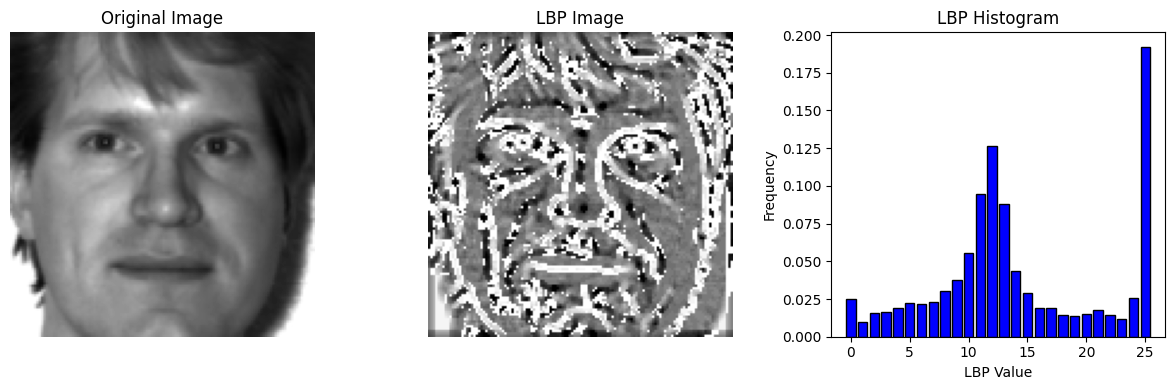

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
lbp_hist = np.load('/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_histogram/subject01.centerlight.npy_lbp_hist.npy')
img_ndarray = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/resized/subject01.centerlight.npy")
# Display the original image
axes[0].imshow(img_ndarray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the LBP image
axes[1].imshow(lbp_img, cmap='gray')
axes[1].set_title("LBP Image")
axes[1].axis('off')

n_bins = len(lbp_hist)
axes[2].bar(range(n_bins), lbp_hist, color='blue', edgecolor='black')
axes[2].set_title("LBP Histogram")
axes[2].set_xlabel("LBP Value")
axes[2].set_ylabel("Frequency")


# Show plot
plt.tight_layout()
plt.show()

In [ ]:
'''overlay_labels highlights areas with specific LBP values
(representing textures like edges, corners, or flat regions) and helps understand where these patterns appear within the image.
'''

def overlay_labels(image, lbp, labels, alpha=0.5):
  # Create a mask that highlights areas where LBP matches any of the given labels
    mask = np.logical_or.reduce([lbp == each for each in labels])
  # Overlay the mask on the original image with transparency
    return label2rgb(mask, image=image, bg_label=0, alpha=alpha)

In [ ]:
def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')

In [ ]:
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5'
    )

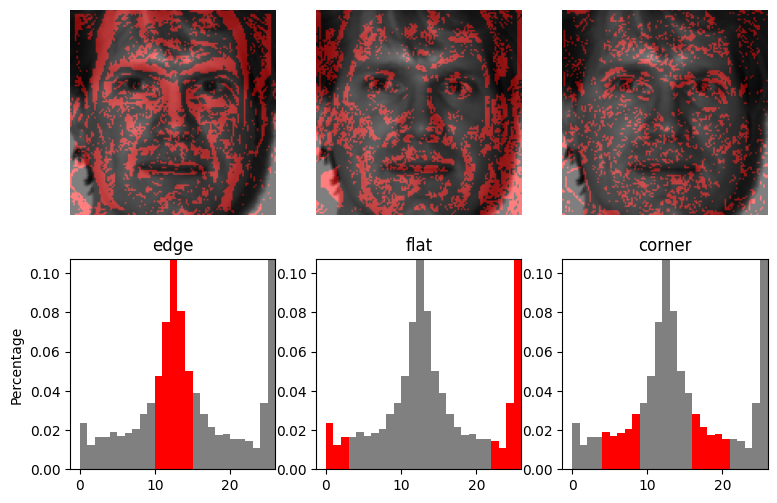

In [ ]:
# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1

edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)  # LBP values representing edges

flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))   # Values for flat areas

i_14 = n_points // 4  # 1/4th of the histogram
i_34 = 3 * (n_points // 4)  # 3/4th of the histogram

corner_labels = list(range(i_14 - w, i_14 + w + 1)) + list(
    range(i_34 - w, i_34 + w + 1)
) # Values for corners

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(img_ndarray, lbp, labels, alpha=0.5))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

In [ ]:
output_zip = 'lbp_array.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', lbp_array_dir)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: lbp_array.zip


## Gabor Filter

### Code

In [ ]:
from skimage.filters import gabor_kernel

In [ ]:
# Define parameters
lambdas = [10, 20, 30]  # Wavelengths
thetas = [0, np.pi/4, np.pi/2]  # Orientations
psi = 0    # Phase offset
sigma = 4  # Standard deviation
gamma = 0.5 # Spatial aspect ratio

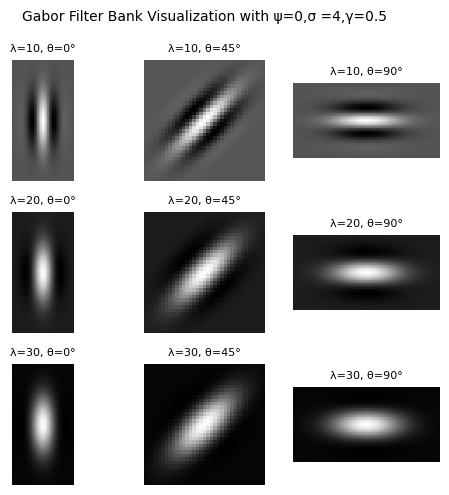

In [ ]:
# Create a figure to display the filters
fig, axes = plt.subplots(3, 3, figsize=(5,5))
fig.suptitle(f"Gabor Filter Bank Visualization with ψ={psi},σ ={sigma},γ={gamma}", fontsize=10)

# Loop through each wavelength and orientation to generate and display filters
for i, wavelength in enumerate(lambdas):
    for j, theta in enumerate(thetas):
        gabor_kern = gabor_kernel(frequency=1.0/wavelength, theta=theta, sigma_x=sigma, sigma_y=sigma/gamma, offset=psi)

        # Plot the real part of the Gabor filter
        ax = axes[i, j]
        ax.imshow(np.real(gabor_kern), cmap='gray')
        ax.set_title(f"λ={wavelength}, θ={np.degrees(theta):.0f}°",fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def extract_gabor(image, lambdas=lambdas, thetas=thetas,visualize=False):
# Iterates over each combination of wavelength (lambdas) and orientation (thetas).
# For each combination, a Gabor kernel is created using gabor_kernel() with specific parameters for frequency, orientation (theta), and standard deviations (sigma_x and sigma_y).
# The kernel is convolved with the input image using convolve() to get the filtered output.
# The mean and variance of the real part of the convolved image are calculated and appended as features.

    features = []
    conv_results = []  # List to store the convolution results for visualization

    for wavelength in lambdas:
        for theta in thetas:
            gabor_kern = gabor_kernel(frequency=1.0/wavelength,theta=theta, sigma_x=sigma,sigma_y=sigma/gamma,offset=psi)

            # Apply the filter to the image
            conv_result = convolve(image, np.real(gabor_kern))
            conv_results.append(conv_result)  # Store for visualization


            # Extract mean and variance of the filter responses as features
            mean_real = np.mean(conv_result)
            var_real = np.var(conv_result)

            features.append(mean_real)
            features.append(var_real)

    if visualize:
        return np.array(features), conv_results
    else:
        return np.array(features)


In [ ]:
gabor_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/gabor_features"
if not os.path.exists(gabor_dir):
    os.makedirs(gabor_dir)

In [ ]:
for filename in os.listdir(resized_dir):
    if filename.endswith(".npy"):
        file_path = os.path.join(resized_dir, filename)
        image = np.load(file_path)
        gabor_features = extract_gabor(image)
        gabor_save_path = os.path.join(gabor_dir, f"{filename}_gabor.npy")
        np.save(gabor_save_path, gabor_features)

In [ ]:
i = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/resized/subject01.centerlight.npy")
gabor_features = np.load('/content/Face_Recognition_from_Features_using_Yale_Face_Database/gabor_features/subject01.centerlight.npy_gabor.npy')
print(f"The shape of original image is {i.shape}")
print(f"The shape of Gabor Features of the image is {gabor_features.shape}")

The shape of original image is (128, 128)
The shape of Gabor Features of the image is (18,)


### Visualize

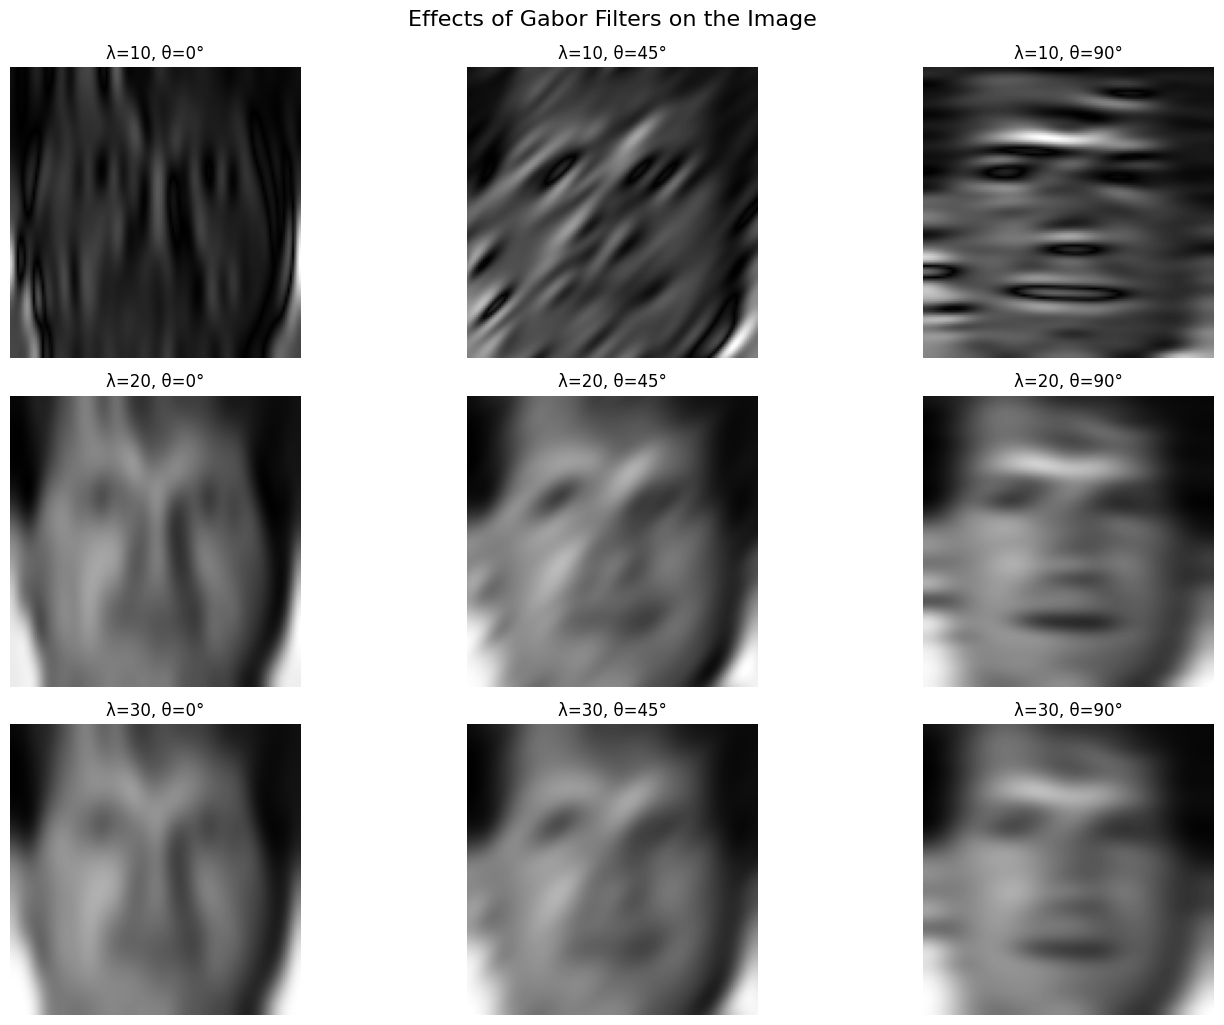

In [ ]:
i = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/resized/subject01.centerlight.npy")

_, gabor_imgs = extract_gabor(i, visualize=True)

# Visualize all the filtered results
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
lambdas = [10, 20, 30]
thetas = [0, np.pi/4, np.pi/2]

for i, ax in enumerate(axes.flat):
    ax.imshow(np.abs(gabor_imgs[i]), cmap='gray')
    wavelength = lambdas[i // 3]
    theta = thetas[i % 3]
    ax.set_title(f"λ={wavelength}, θ={np.degrees(theta):.0f}°")
    ax.axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.suptitle("Effects of Gabor Filters on the Image", fontsize=16, y=1.02)
plt.show()


In [ ]:
output_zip = 'gabor_features.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', gabor_dir)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: gabor_features.zip


## LOG

### Code

In [ ]:
log_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG"
os.makedirs(log_dir, exist_ok=True)

In [ ]:
npy_files = [f for f in os.listdir(resized_dir) if f.endswith('.npy')]

# Function to apply Laplacian of Gaussian (LoG) transformation
def laplacian_of_gaussian(image, kernel_size=3):
    # Convert the image to CV_64F before applying GaussianBlur
    blurred_image = cv2.GaussianBlur(image.astype(np.float64), (kernel_size, kernel_size), 0)
    log_image = cv2.Laplacian(blurred_image, cv2.CV_64F)
    return log_image

# Process and save each image
for file_name in npy_files:
    # Load the .npy file
    image_path = os.path.join(resized_dir, file_name)
    image = np.load(image_path)

    # apply LoG transformation
    log_image = laplacian_of_gaussian(image)

    # Save the transformed image as a new .npy file
    transformed_path = os.path.join(log_dir, file_name)
    np.save(transformed_path, log_image)
    print(f"Transformed and saved: {transformed_path}")

Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject03.happy.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject05.wink.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject09.centerlight.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject07.rightlight.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject05.sleepy.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject03.wink.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject09.surprised.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/LoG/subject04.normal.npy
Transformed and saved: /content/Face_Recognition_from_Features_using_Yale_Face_Database/L

### Visualizing

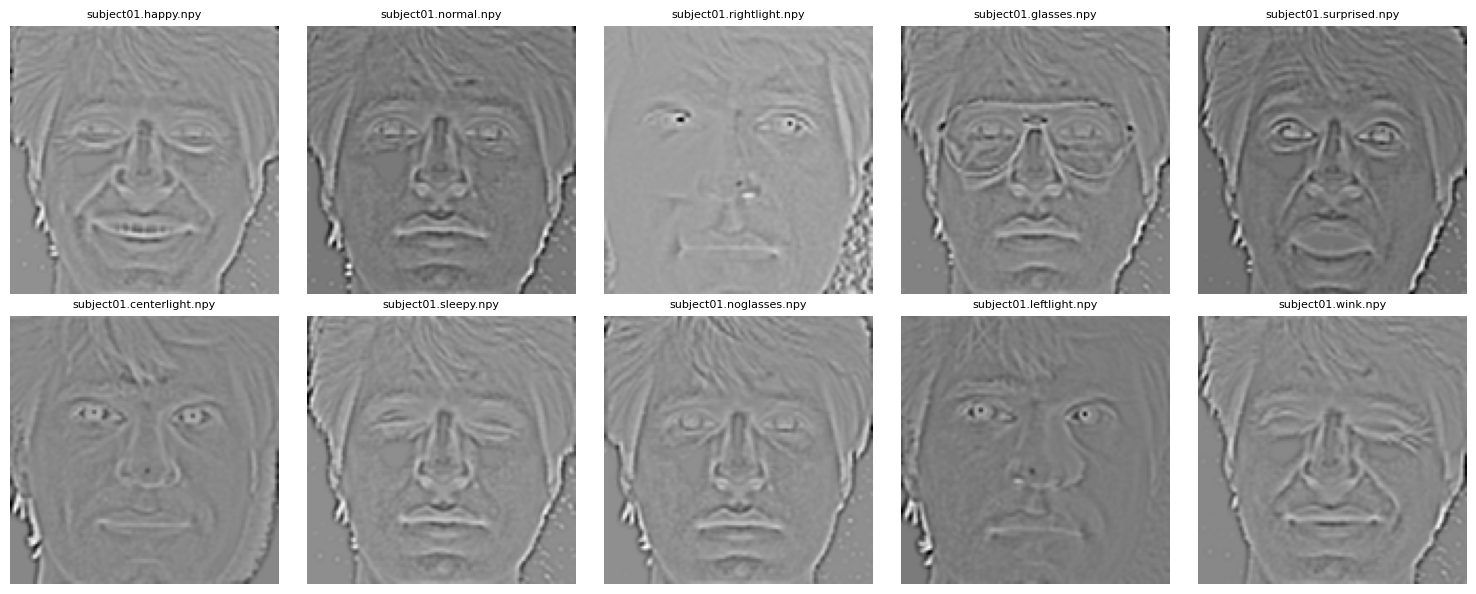

In [ ]:
npy_files = [f for f in os.listdir(log_dir) if f.startswith('subject01') and f.endswith('.npy')]
files_to_display = npy_files[:10]
rows, cols = 2, 5
plt.figure(figsize=(15, 6))

for i, file_name in enumerate(files_to_display):
    log_image_path = os.path.join(log_dir, file_name)
    log_image = np.load(log_image_path)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(log_image, cmap='gray')
    plt.title(file_name, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
output_zip = 'LoG.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', log_dir)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: LoG.zip


## GLCM

### Code

In [ ]:
from skimage import feature
from skimage.feature import graycomatrix, graycoprops

In [ ]:
glcm_dir = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/glcm'

if not os.path.exists(glcm_dir):
    os.makedirs(glcm_dir)

In [ ]:
# Function to calculate GLCM features
def calculate_glcm_features(image):

    # Scale the image to the range [0, 255] for GLCM calculation
    gray_image_scaled = (image * 255).astype(np.uint8)

    # Calculate GLCM
    glcm = feature.graycomatrix(gray_image_scaled, [1], [0], symmetric=True, normed=True)

    # Extract features
    features = {
        'contrast': feature.graycoprops(glcm, 'contrast')[0, 0],
        'dissimilarity': feature.graycoprops(glcm, 'dissimilarity')[0, 0],
        'homogeneity': feature.graycoprops(glcm, 'homogeneity')[0, 0],
        'energy': feature.graycoprops(glcm, 'energy')[0, 0],
        'correlation': feature.graycoprops(glcm, 'correlation')[0, 0],
        'entropy': -np.sum(glcm[0] * np.log2(glcm[0] + 1e-10))  # Adding small value to avoid log(0)
    }

    return features

# Iterate through images in the processed_data folder
for filename in os.listdir(resized_dir):
    if filename.endswith('.npy'):
        image_path = os.path.join(resized_dir, filename)
        image = np.load(image_path)

        # Calculate features
        features = calculate_glcm_features(image)

        # Save features to a CSV file
        feature_vector = pd.DataFrame(features, index=[0])
        feature_vector.to_csv(os.path.join(glcm_dir, f'{os.path.splitext(filename)[0]}_features.csv'), index=False)

print("Feature extraction completed and saved in", glcm_dir)

Feature extraction completed and saved in /content/Face_Recognition_from_Features_using_Yale_Face_Database/glcm


### Visualization

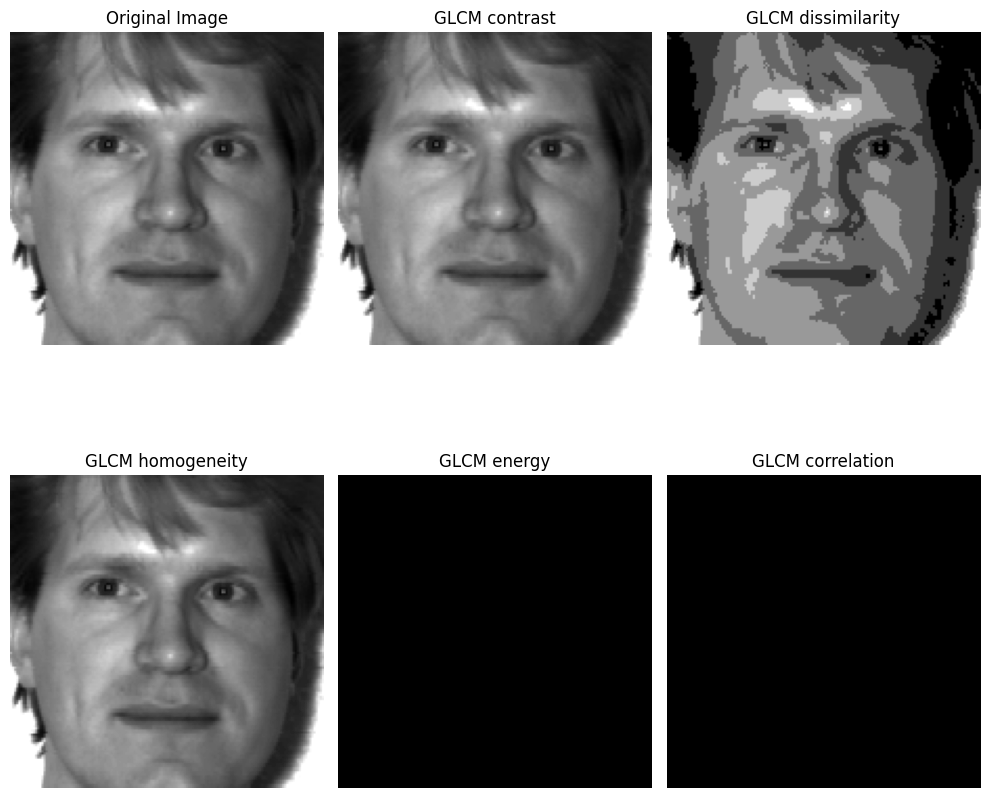

In [ ]:
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

image_path = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_faces/subject01.centerlight.npy'
image = np.load(image_path)

if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)

glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

num_features = len(properties)
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title(f"Original Image")
axes[0, 0].axis('off')

for i, prop in enumerate(properties):
    feature_values = graycoprops(glcm, prop).squeeze()

    if prop == 'contrast':
        min_intensity, max_intensity = np.min(image), np.max(image)
        manipulated_image = (image - min_intensity) * (255 / (max_intensity - min_intensity))
        manipulated_image = np.clip(manipulated_image, 0, 255).astype(np.uint8)
    elif prop == 'dissimilarity':
        manipulated_image = np.clip(image * feature_values.mean() / 255, 0, 255).astype(np.uint8)
    elif prop == 'homogeneity':
        manipulated_image = np.clip(image * (1 - feature_values.mean() / 100), 0, 255).astype(np.uint8)
    elif prop == 'energy':
        manipulated_image = np.clip(image * feature_values.mean() / 255, 0, 255).astype(np.uint8)
    elif prop == 'correlation':
        manipulated_image = np.clip(image * feature_values.mean() / 255, 0, 255).astype(np.uint8)

    row, col = divmod(i + 1, 3)
    axes[row, col].imshow(manipulated_image, cmap='gray')
    axes[row, col].set_title(f"GLCM {prop}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


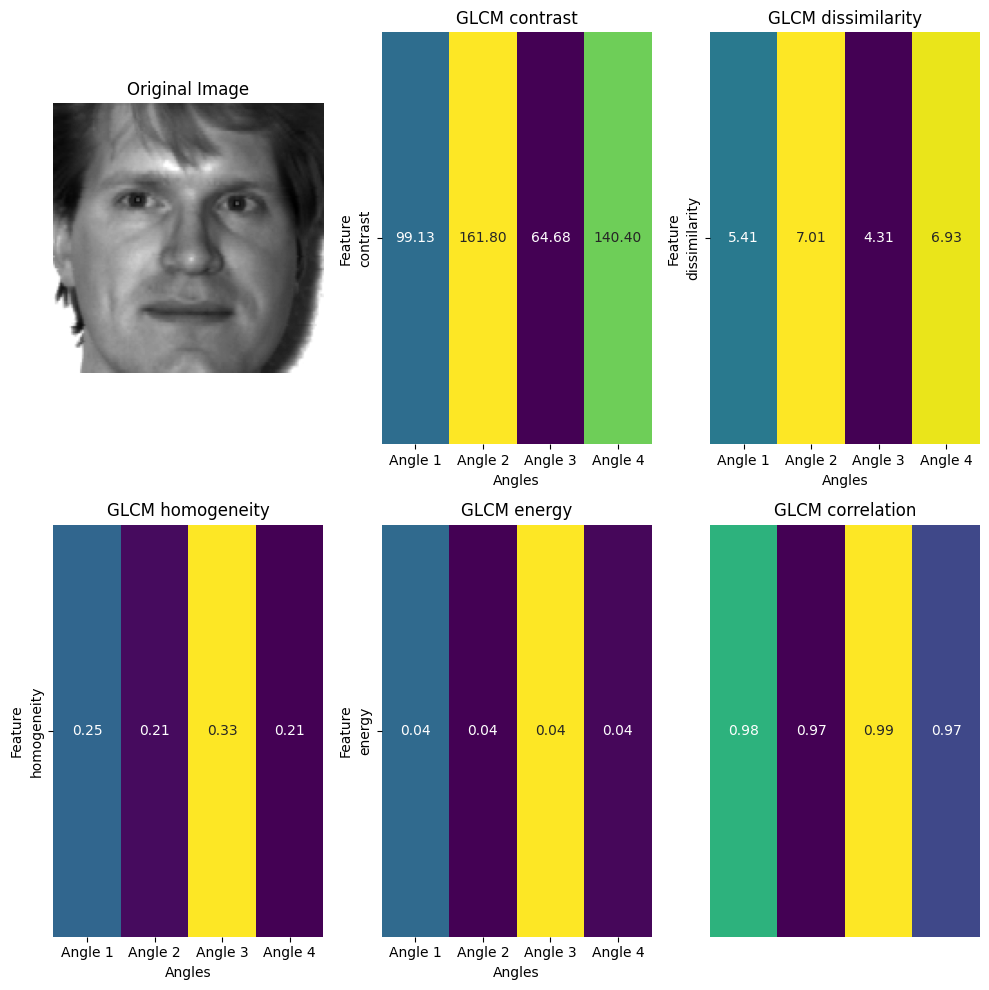

In [ ]:
# Parameters for GLCM
distances = [1]  # Default distance
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Default angles
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

image_path = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/cropped_faces/subject01.centerlight.npy'
image = np.load(image_path)
image_file = 'subject01.centerlight.npy'

if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)

glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

fig, axes = plt.subplots(2, 3, figsize=(10,10))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

for i, prop in enumerate(properties):
    feature_values = graycoprops(glcm, prop).squeeze()
    ax = axes[(i+1)//3, (i+1)%3]
    sns.heatmap(
        feature_values.reshape(1, -1),
        annot=True, fmt=".2f", cmap="viridis", cbar=False,
        xticklabels=[f"Angle {j+1}" for j in range(len(angles))],
        yticklabels=[prop],
        ax=ax
    )
    ax.set_title(f"GLCM {prop}")
    ax.set_xlabel("Angles")
    ax.set_ylabel("Feature")

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
output_zip = 'glcm.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', glcm_dir)
print(f"Folder zipped successfully: {output_zip}")

Folder zipped successfully: glcm.zip


# Classification

### COMBINING FEATURES

In [21]:
# Paths to each subfolder
base_folder = '/content/Face_Recognition_from_Features_using_Yale_Face_Database/'
log_path = os.path.join(base_folder, 'LoG')
gabor_path = os.path.join(base_folder, 'gabor_features')
glcm_path = os.path.join(base_folder, 'glcm')
lbp_path = os.path.join(base_folder, 'lbp_histogram')

# Initialize lists to store combined features and labels
combined_features = []
labels = []
name = []
# # Define placeholder sizes for missing features if necessary
log_placeholder = np.zeros((50,))       # Replace 50 with actual feature size if known
gabor_placeholder = np.zeros((80,))     # Replace 80 with actual feature size if known
glcm_placeholder = np.zeros((30,))      # Replace 30 with actual feature size if known
lbp_placeholder = np.zeros((60,))       # Replace 60 with actual feature size if known

# Load and combine features based on filenames
for filename in os.listdir(log_path):
    # Extract base name and label
    base_name = filename.replace('.npy', '')
    l = base_name.split('.')[0]
    name.append(base_name)
    label = int(l[7:9])
    log_features = np.load(os.path.join(log_path, filename)).flatten() if os.path.exists(os.path.join(log_path, filename)) else log_placeholder

    # Load and flatten Gabor features with updated filename pattern
    gabor_filename = f"{base_name}.npy_gabor.npy"
    gabor_features = np.load(os.path.join(gabor_path, gabor_filename)).flatten() if os.path.exists(os.path.join(gabor_path, gabor_filename)) else gabor_placeholder

    # Load and flatten GLCM features from CSV
    glcm_filename = f"{base_name}_features.csv"
    if os.path.exists(os.path.join(glcm_path, glcm_filename)):
        glcm_df = pd.read_csv(os.path.join(glcm_path, glcm_filename))
        glcm_features = glcm_df.values.flatten()
    else:
        glcm_features = glcm_placeholder

    # Load and flatten LBP features
    lbp_filename = f"{base_name}.npy_lbp_hist.npy"
    lbp_features = np.load(os.path.join(lbp_path, lbp_filename)).flatten() if os.path.exists(os.path.join(lbp_path, lbp_filename)) else lbp_placeholder

    # Concatenate all features for this image
    combined_feature_vector = np.concatenate((log_features, gabor_features, glcm_features, lbp_features))
    combined_features.append(combined_feature_vector)
    labels.append(label)

print(f"Filename: {filename}")
print(f"LoG features length: {len(log_features)}")
print(f"Gabor features length: {len(gabor_features)}")
print(f"GLCM features length: {len(glcm_features)}")
print(f"LBP features length: {len(lbp_features)}")
print(f"Combined feature vector length: {len(combined_feature_vector)}\n")

combined_features = np.array(combined_features)
labels = np.array(labels)

print(f"Size of combined features: {combined_features.shape}")
print(f"Size of labels: {len(labels)}")

Filename: subject02.rightlight.npy
LoG features length: 16384
Gabor features length: 18
GLCM features length: 6
LBP features length: 26
Combined feature vector length: 16434

Size of combined features: (165, 16434)
Size of labels: 165


In [ ]:
print(set(labels))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


### SPLITING TO TRAIN AND TESTING

In [22]:
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.20, random_state=42, stratify = labels)


### SCALING AND APPLYING PCA

In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16424,16425,16426,16427,16428,16429,16430,16431,16432,16433
0,0.000000,0.000000,-2.980232e-08,7.450581e-09,7.450581e-08,7.450581e-09,-2.980232e-08,0.000000,0.000000,-0.042919,...,0.018738,0.016724,0.015381,0.017578,0.018921,0.016052,0.012634,0.009949,0.021240,0.224304
1,0.000000,0.000000,-9.059489e-03,-1.139503e-01,-2.329193e-01,-1.366296e-01,2.330372e-02,0.039643,0.002132,-0.012296,...,0.015808,0.016479,0.015686,0.018127,0.018372,0.018127,0.017029,0.013184,0.023193,0.249451
2,-0.002917,0.000473,6.101133e-03,4.985315e-03,-1.531968e-03,-1.641330e-03,4.541247e-03,0.007283,0.002912,-0.003079,...,0.026306,0.022339,0.020813,0.019653,0.018616,0.014282,0.010803,0.006958,0.054932,0.171997
3,-0.036273,-0.024528,-2.674374e-02,-6.740289e-02,-8.469102e-02,-3.640623e-02,2.013764e-02,0.031825,0.011782,-0.007371,...,0.017456,0.018982,0.012817,0.014343,0.014587,0.016724,0.014954,0.011536,0.046143,0.162292
4,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.019714,0.019714,0.014221,0.017273,0.015686,0.016296,0.012451,0.013000,0.022217,0.250610


In [24]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,16424,16425,16426,16427,16428,16429,16430,16431,16432,16433
0,0.424766,0.443362,0.283129,0.299192,0.287152,0.236883,0.251071,0.285085,0.325244,-0.174119,...,-0.622910,-0.935676,-0.046340,0.728455,1.061200,-0.154009,-1.329920,-0.810917,-0.959520,0.209950
1,0.424766,0.443362,0.158748,-1.096613,-2.605693,-1.497963,0.576354,0.837234,0.352272,0.209400,...,-1.642480,-1.001645,0.094603,0.961843,0.832521,0.853558,0.706092,0.481378,-0.850828,0.880490
2,0.391996,0.450784,0.366895,0.360258,0.268124,0.216042,0.314460,0.386516,0.362162,0.324833,...,2.010979,0.581596,2.462442,1.610145,0.934156,-1.013403,-2.178258,-2.005680,0.915415,-1.184837
3,0.017329,0.058445,-0.084048,-0.526443,-0.764706,-0.225383,0.532160,0.728341,0.474632,0.271083,...,-1.068971,-0.325469,-1.230260,-0.645944,-0.742821,0.171969,-0.255358,-0.176961,0.426302,-1.443613
4,0.424766,0.443362,0.283130,0.299192,0.287151,0.236883,0.251071,0.285085,0.325244,0.363391,...,-0.283053,-0.127564,-0.581923,0.598795,-0.285463,-0.035471,-1.414754,0.408229,-0.905174,0.911413


In [26]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [27]:
print(f"The dimension of feature vector before transformation: {X_train.shape}")
print(f"The dimension of feature vector after transformation: {X_train_pca.shape}")
print(f"The number of features dropped by PCA: {(X_train.shape)[1]-(X_train_pca.shape)[1]}")

The dimension of feature vector before transformation: (132, 16434)
The dimension of feature vector after transformation: (132, 105)
The number of features dropped by PCA: 16329


### Random Forest

In [ ]:
classifier1 = rfc(n_estimators=100, random_state=42)
classifier1.fit(X_train, y_train)

# Test and evaluate
y_pred_rfs1 = classifier1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_rfs1)

print(f"Classification accuracy with Random Forest: {accuracy1 * 100:.2f}%")
print(classification_report(y_test, y_pred_rfs1))

Classification accuracy with Random Forest: 66.67%
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       0.60      1.00      0.75         3
           5       0.50      0.50      0.50         2
           6       0.40      1.00      0.57         2
           7       1.00      0.33      0.50         3
           8       0.33      0.50      0.40         2
           9       0.67      1.00      0.80         2
          10       0.67      1.00      0.80         2
          11       0.50      0.50      0.50         2
          12       1.00      1.00      1.00         2
          13       1.00      0.67      0.80         3
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2

    accuracy                           0.67        33
   macro avg       0.71      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
classifier2 = rfc(n_estimators=100, random_state=42)
classifier2.fit(X_train_scaled, y_train)

# Test and evaluate
y_pred_rfs2 = classifier2.predict(X_test_scaled)
accuracy2 = accuracy_score(y_test, y_pred_rfs2)

print(f"Classification accuracy with Random Forest: {accuracy2 * 100:.2f}%")
print(classification_report(y_test, y_pred_rfs2))

Classification accuracy with Random Forest: 63.64%
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         3
           5       0.50      0.50      0.50         2
           6       0.33      0.50      0.40         2
           7       0.50      0.33      0.40         3
           8       0.50      0.50      0.50         2
           9       1.00      1.00      1.00         2
          10       0.50      1.00      0.67         2
          11       0.50      0.50      0.50         2
          12       0.67      1.00      0.80         2
          13       1.00      0.33      0.50         3
          14       0.50      0.50      0.50         2
          15       0.50      0.50      0.50         2

    accuracy                           0.64        33
   macro avg       0.67      

In [ ]:
classifier3 = rfc(n_estimators=100, random_state=42)
classifier3.fit(X_train_pca, y_train)

# Test and evaluate
y_pred_rf_pca = classifier3.predict(X_test_pca)
accuracy3 = accuracy_score(y_test, y_pred_rf_pca)

print(f"Classification accuracy with Random Forest: {accuracy3 * 100:.2f}%")
print(classification_report(y_test, y_pred_rf_pca))


Classification accuracy with Random Forest: 54.55%
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         2
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         2
           4       0.25      0.33      0.29         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         3
           8       0.50      0.50      0.50         2
           9       0.67      1.00      0.80         2
          10       0.67      1.00      0.80         2
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         2
          13       1.00      0.33      0.50         3
          14       0.50      0.50      0.50         2
          15       0.50      0.50      0.50         2

    accuracy                           0.55        33
   macro avg       0.59      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Logistic Regression

In [ ]:
log_reg1 = LogisticRegression(random_state=42)
log_reg1.fit(X_train, y_train)
y_pred_log_reg = log_reg1.predict(X_test)
print(f"Logistic Regression Accuracy: {(accuracy_score(y_test, y_pred_log_reg))*100:.2f}%")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 54.55%
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         2
           2       0.50      1.00      0.67         2
           3       0.50      0.50      0.50         2
           4       1.00      0.33      0.50         3
           5       0.50      0.50      0.50         2
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         3
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         2
          10       0.67      1.00      0.80         2
          11       1.00      0.50      0.67         2
          12       0.50      0.50      0.50         2
          13       1.00      0.33      0.50         3
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         2

    accuracy                           0.55        33
   macro avg       0.59      0.58      0.52

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg2.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {(accuracy_score(y_test, y_pred_log_reg))*100:.2f}%")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 78.79%
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.60      1.00      0.75         3
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       0.67      1.00      0.80         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      0.67      0.80         3
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2

    accuracy                           0.79        33
   macro avg       0.86      0.78      0.78

In [ ]:
log_reg3 = LogisticRegression(random_state=42)
log_reg3.fit(X_train_pca, y_train)
y_pred_log_reg_pca = log_reg3.predict(X_test_pca)
print(f"Logistic Regression Accuracy: {(accuracy_score(y_test, y_pred_log_reg_pca))*100:.2f}%")
print(classification_report(y_test, y_pred_log_reg_pca))

Logistic Regression Accuracy: 66.67%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.50      0.50      0.50         2
           4       0.38      1.00      0.55         3
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.50      0.33      0.40         3
           8       1.00      0.50      0.67         2
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      0.33      0.50         3
          14       1.00      0.50      0.67         2
          15       0.50      0.50      0.50         2

    accuracy                           0.67        33
   macro avg       0.79      0.68      0.69

## SVC

In [ ]:
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train_scaled, y_train)
y_pred_svc = svc_classifier.predict(X_test_scaled)
print(f"SVC Accuracy: {(accuracy_score(y_test, y_pred_svc))*100:.2f}%")
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 66.67%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       0.50      0.50      0.50         2
           4       0.38      1.00      0.55         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3
           8       1.00      0.50      0.67         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      0.33      0.50         3
          14       1.00      0.50      0.67         2
          15       0.25      0.50      0.33         2

    accuracy                           0.67        33
   macro avg       0.83      0.67      0.69        33
weigh

In [ ]:
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train_pca, y_train)
y_pred_svc = svc_classifier.predict(X_test_pca)
print(f"SVC Accuracy: {(accuracy_score(y_test, y_pred_svc))*100:.2f}%")
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 54.55%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.20      1.00      0.33         2
           4       0.22      0.67      0.33         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      0.33      0.50         3
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         2

    accuracy                           0.55        33
   macro avg       0.76      0.56      0.58        33
weigh

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
